In [2]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Linear Regression</center></h1>

<b>Linear Regression</b> is a useful tool for predicting a quantitative response.

### 3.1 Simple Linear Regression

<b>Simple linear regression</b> is a straightforward approach for predicting a <b>quantitative response</b> on the basis of a single predictor variable. Mathematically it can be written as:

$$Y \approx \beta_0 + \beta_1 X$$

$\beta_0$ and $\beta_1$ represent intercept and slope and are called as <b>model coefficients or parameters.</b> The estimated equation is given as:

$$\widehat{y} \approx \widehat{\beta_0} + \widehat{\beta_1} x$$

where hat symbol is used to denote the estimated values.

#### 3.1.1 Estimating the Coefficients 

The goal of linear regression is to find the estimate and slope such that the line is as close as possible to the data points. There are a number of ways of measuring <b>closeness</b>. The most common approach involves minimizing the <b>least square</b> criterion.

Let $\widehat{y_i} \approx \widehat{\beta_0} + \widehat{\beta_1} x_i$ be the prediction for $i$th value of X, then $e_i = y_i - \widehat{y_i}$ represents the <b>$i$th residual</b>. We define the <b>residual sum of squares(RSS)</b> as:

$$RSS = e_1^2 + e_2^2 + ... + e_n^2$$

The least square method chooses the coefficient to minimize RSS and are given as:

$$\widehat{\beta_1} = \frac{\sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = 
\frac{Cov(X, Y)}{Var(X)}$$

$$\beta_0 = \bar{y} - \widehat{\beta_1}\bar{x}$$

where $\bar{y}$ and $\bar{x}$ are the sample means. Below figure shows the simple regression and residual plot for advertisement data (sales vs TV).

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


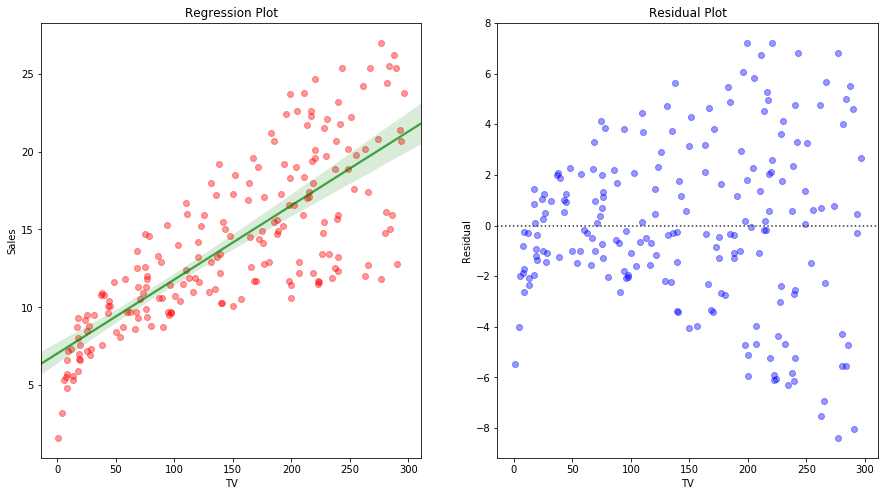

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

adv = pd.read_csv("data/Advertising.csv")

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(121)
sns.regplot(x="TV", y="Sales", color='r', fit_reg=True, data=adv, order=1, scatter_kws={'alpha':0.4}, 
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.set_title('Regression Plot')

ax = fig.add_subplot(122)
sns.residplot(x="TV", y="Sales", color='blue', data=adv, order=1, scatter_kws={'alpha':0.4}, 
            line_kws={'color':'g', 'alpha':0.7})
ax.set_xlabel('TV')
ax.set_ylabel('Residual')
ax.set_title('Residual Plot')

plt.show()

#### 3.1.2 Assessing the Accuracy of the Coefficient Estimates

True relationship between $X$ and $Y$ takes the form $Y = f(X) + \epsilon$, where $\epsilon$ is a <b>mean-zero random error term.</b> For the estimation of $f$ from a linear function, the relationship can be written as:

$$Y = \beta_0 + \beta_1 X + \epsilon$$

The model given by above equation represents <b>population regression line</b>, which is the best linear approximation to the true relationship between $X$ and $Y$. The <b>least square regression line</b> estimates the population regression line. Concept of these two lines is a natural extension of the standard statistical approach of using information from a sample to estimate characteristics of a large population.

If we use averaged sample mean (average over a large set of samples) to estimate population mean, the estimation is <b>unbiased</b>. Similary if we average the estimates of the model coefficients over a huge number of data sets, then it will somewhat be an accurate estimation of population regression line.

<b>Standard error</b> in the estimation of population mean from the sample mean (when a single data set is used for estimation) is given as:

$$Var(\widehat{\mu}) = SE(\widehat{\mu})^2 = \frac{\sigma^2}{n}$$

If we use a single data set to estimate $\beta_0$ and $\beta_1$, the <b>standard errors</b> associated with them is given as:

$$SE(\beta_0)^2 = \sigma^2 \Big[ \frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2} \Big]$$

$$SE(\beta_1)^2 = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

where $\sigma^2 = Var(\epsilon)$. From the formula, it can be observed that <b>error in slope is smaller if $x_i$s are more spread out.</b> We can also see that $SE(\widehat{\beta_0})$ will be equal to $SE(\widehat{\mu})$ if $\bar{x} = 0$.

Standard errors can be used to compute <b>confidence intervals</b>. For linear regression, the 95% confidence interval takes the form:

$$\widehat{\beta_i} \pm 2SE(\widehat{\beta_i})$$

Standard errors can also be used to perform <b>hypothesis tests</b>. For linear regression, the hypothesis test can be defined as:

 - $H_0$: There is no relationship between X and Y ($\beta_1 = 0$)
 - $H_a$: There is some relatioship between X and Y ($\beta_1 \neq 0$)
 
To test the null hypothesis $H_0$, we need to determine that whether $\widehat{\beta_1}$ is sufficiently far from 0. In practice, it can be determined by <b>t-statistic</b> which measures the number of standard deviations it is away from 0 and is given as:

$$t = \frac{\widehat{\beta_1} - 0}{SE(\beta_1)}$$

If there is no relationship between $X$ and $Y$, we expect that above equation will have a t-distribution with $n-2$ degrees of freedom. For large values of n(>30), it is quite similar to normal distribution. The <b>p-value</b> measures the strength of the relationship. <b>If p-value is small, we can reject the null hypothesis</b> and can say that there is significant relationship between $X$ and $Y$.

#### 3.1.3 Assessing the Accuracy of the Model

The quality of linear regression fit is assessed using: the <b>residual standard error (RSE)</b> and the <b>$R^2$ statistic</b>.

<b>Residual Standard Error</b> is an estimate of the standard deviation of $\epsilon$. It is the average amount that the response will deviate from the true regression line. It is computed as (where <b>RSS</b> is residual sum of squares):

$$RSE = \sqrt{\frac{1}{n-2} \sum_{i=1}^{n}(y_i - \widehat{y_i})^2} = \sqrt{\frac{1}{n-2} RSS}$$

How much value of RSE is acceptable depends on the context.

<b>R$^2$ statistic</b> takes the form of proportion and takes value between 0 and 1 and hence is independent of the scale of $Y$. It is given as:

$$R^2 = \frac{TSS-RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

where $TSS = \sum_{i=1}^{n}(y_i - \bar{y})$ is the <b>total sum of squares</b> or it can be termed as total variance in Y. For the interpretation, TSS can be interpreted as total variance in response Y before the regression is performed and RSS is the amount of variability that is left unexplained. Hence, $TSS-RSS$ is the amount of variability explained by the model. Hence, a <b>higher value of R$^2$ statistic (closer to 1) represents better fit.</b>

<b>Correlation coefficient</b>, which is defined as:

$$Cor(X, Y) = \frac{Cov(x, Y)}{\sigma_x \sigma_Y} = 
\frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$

also measures linear relationship between two varibles $X$ and $Y$. It can be shown that the <b>the squared correlation coefficient</b>, $r^2 = R^2$ for linear regression, where $r^2 = Cor(X, Y)$.